In [1]:
from fastai.basics import *
from scans import preprocess
import scans

path = Path('/home/renato/data/brats/raw')
path.ls()

[PosixPath('/home/renato/data/brats/raw/validation'),
 PosixPath('/home/renato/data/brats/raw/train')]

# Preprocess to bcolz

In [2]:
out_path = Path('/home/renato/data/brats/preprocess')

In [10]:
preprocess.preprocess_brats(path/'train', out_path/'train', size=128)

In [37]:
preprocess.preprocess_brats(path/'validation', out_path/'validation', size=128, train_data=False)

# Load data

In [3]:
(out_path/'train').ls()

[PosixPath('/home/renato/data/brats/preprocess/train/mapping.csv'),
 PosixPath('/home/renato/data/brats/preprocess/train/metadata.csv'),
 PosixPath('/home/renato/data/brats/preprocess/train/labels'),
 PosixPath('/home/renato/data/brats/preprocess/train/data')]

In [7]:
data = (scans.SegmentationItemList.from_paths(out_path/'train/data', out_path/'train/labels')
                                  .split_by_rand_pct(0.2, seed=7)
                                  .label_from_bcolz()
                                  .transform(scans.get_transforms(), tfm_y=True)
                                  .databunch(bs=4)
                                  .normalize())

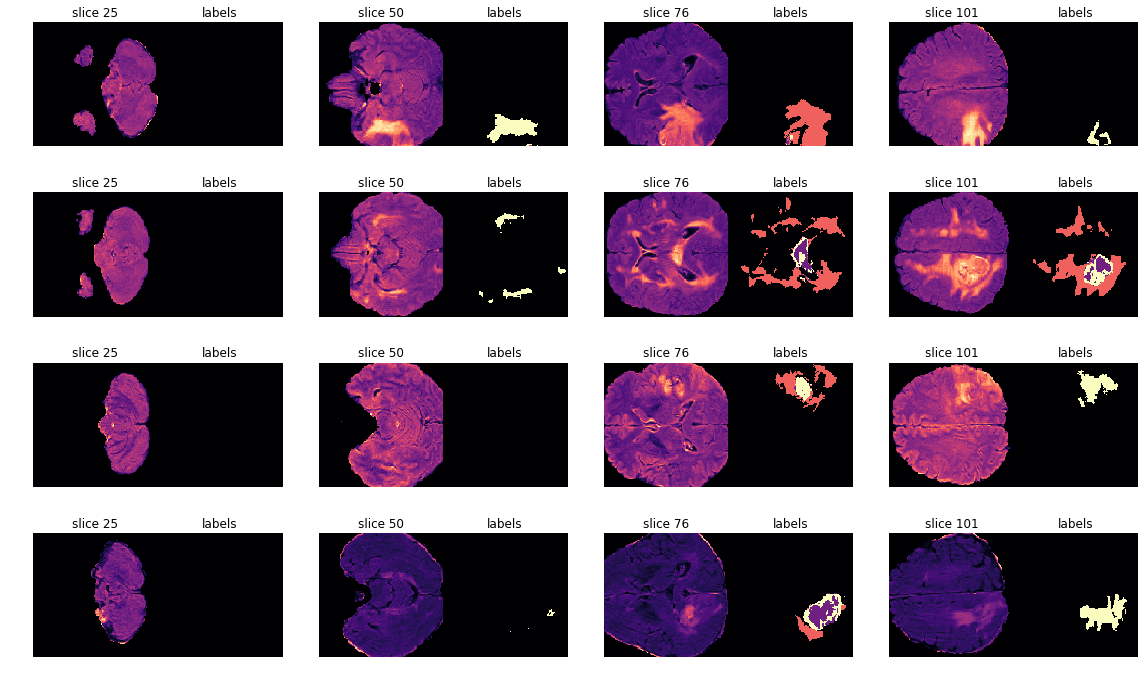

In [8]:
data.show_batch()

# -